In [1]:
from interpolML.model.orbit import Orbit
from interpolML.model.neural_prophet import NProphet
from orbit.utils.dataset import load_iclaims
from interpolML.diagnostics.plotter import Plotter

# Orbit Model

In [2]:
orbit = Orbit(freq="W")

In [3]:
df = load_iclaims()
test_size = 200
train_df = df[:-test_size]
test_df = df[-test_size:]

In [5]:
orbit.fit(train_df)
predicted_df = orbit.predict(test_df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [24]:
train_df

,ds,y
0,2010-01-03,13.386595
1,2010-01-10,13.624218
2,2010-01-17,13.398741
3,2010-01-24,13.137549
4,2010-01-31,13.196760
...,...,...
338,2016-06-26,12.482423
339,2016-07-03,12.496639
340,2016-07-10,12.607105
341,2016-07-17,12.500703


In [26]:
test_df

,ds,y
343,2016-07-31,12.297749
344,2016-08-07,12.352517
345,2016-08-14,12.299426
346,2016-08-21,12.287703
347,2016-08-28,12.281588
...,...,...
438,2018-05-27,12.220202
439,2018-06-03,12.162763
440,2018-06-10,12.288984
441,2018-06-17,12.235743


           ds  prediction  prediction_5  prediction_95
0  2016-07-31   12.283249     12.243210      12.323288
1  2016-08-07   12.346515     12.306476      12.386554
2  2016-08-14   12.292902     12.252863      12.332941
3  2016-08-21   12.294576     12.254537      12.334615
4  2016-08-28   12.290739     12.250700      12.330778
..        ...         ...           ...            ...
95 2018-05-27   12.141442     12.101403      12.181481
96 2018-06-03   12.180294     12.140255      12.220333
97 2018-06-10   12.257755     12.217716      12.297794
98 2018-06-17   12.193981     12.153942      12.234021
99 2018-06-24   12.271162     12.231123      12.311201

[100 rows x 4 columns]


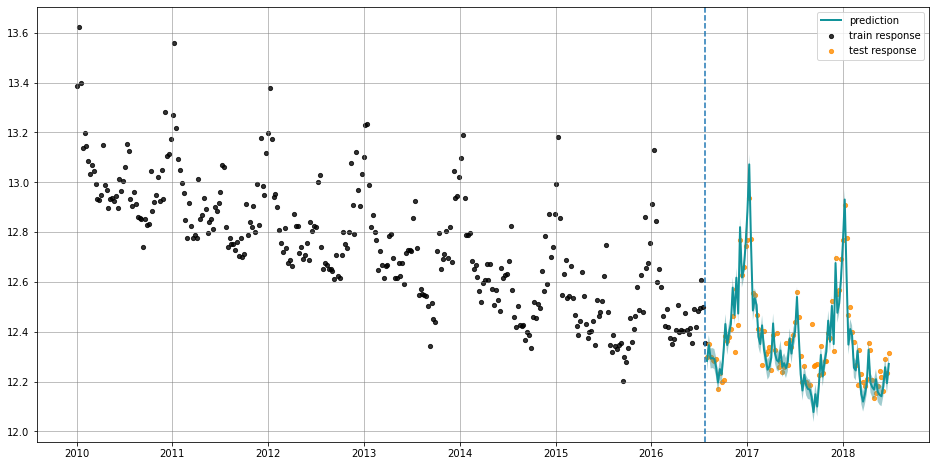

In [7]:
Plotter(orbit).plot_predicted_data()

# Neural Prophet

In [15]:
neural_prophet = NProphet(freq="W")

In [16]:
train_df = train_df[["ds", "y"]]

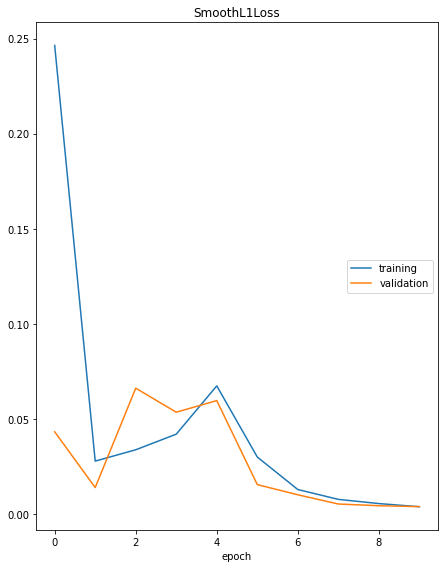

Epoch[10/10]: 100%|██████████| 10/10 [00:01<00:00,  6.01it/s, SmoothL1Loss=0.00389, MAE=0.0675, RegLoss=0, MAE_val=0.0639, SmoothL1Loss_val=0.00396]


In [17]:
neural_prophet.fit(train_dataset=train_df)

           ds  prediction  prediction_5  prediction_95
0  2016-07-31   12.301435     12.268251      12.334620
1  2016-08-07   12.248117     12.214933      12.281302
2  2016-08-14   12.211760     12.178575      12.244944
3  2016-08-21   12.191323     12.158139      12.224508
4  2016-08-28   12.181827     12.148642      12.215011
..        ...         ...           ...            ...
95 2018-05-27   12.058103     12.024918      12.091287
96 2018-06-03   12.082849     12.049664      12.116033
97 2018-06-10   12.130056     12.096872      12.163241
98 2018-06-17   12.186736     12.153551      12.219921
99 2018-06-24   12.235348     12.202163      12.268532

[100 rows x 4 columns]


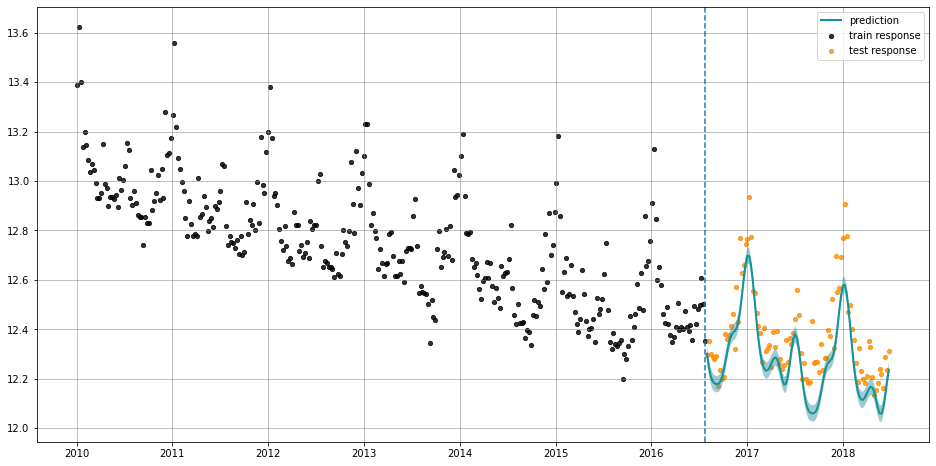

In [23]:
Plotter(neural_prophet).plot_predicted_data()